In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score , classification_report #calculate accuracy
from hog import preprocessing
import matplotlib.pyplot as plt

In [4]:
path = "D:\GitHub\ML-analysis\dataset"
data_train, label_train, data_test, label_test = preprocessing(path)

In [5]:
def _transform_data(data, labels):
    #Generate input array X
    X = np.array(data)

    #Generate output array y
    lbe = LabelEncoder()
    lbe.fit(labels)
    y = lbe.transform(labels)

    return X, y

In [6]:
#poly kernel
X_train , y_train = _transform_data(data_train, label_train)
X_test , y_test = _transform_data(data_test, label_test)

In [7]:
model = svm.SVC(kernel='poly', degree = 3, gamma= 0.1,C=75, coef0=1)
model.fit(X_train,y_train)

SVC(C=75, coef0=1, gamma=0.1, kernel='poly')

In [8]:
prediction = model.predict(X_test)

In [10]:
rp = metrics.classification_report(y_test, prediction, target_names=['anger', 'happy', 'neutral', 'sad', 'suprise'],output_dict=True)
rp = pd.DataFrame(rp).transpose()
rp.drop("support",axis=1,inplace=True)
rp.drop("macro avg",axis=0,inplace=True)
rp.drop("weighted avg",axis=0,inplace=True)
rp.drop("accuracy",axis=0,inplace=True)
rp = round(rp.iloc[0:]*100,2)
rp

,precision,recall,f1-score
anger,100.0,100.0,100.0
happy,100.0,100.0,100.0
neutral,100.0,100.0,100.0
sad,100.0,100.0,100.0
suprise,100.0,100.0,100.0


In [11]:
def show_plot(title,data):
    face = ['anger', 'happy', 'neutral', 'sad', 'suprise']

    # Create a bar chart
    bars = plt.bar(face, data, color=['red', 'lightgreen', 'yellow', 'gray', 'plum'])

    # Add labels and title
    plt.xlabel('Expression')
    plt.ylabel('Percentage (%)')
    plt.title(title)

    for bar in bars:
        val = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, val, round(val, 2), ha='center', va='bottom')
    # Show the bar chart
    plt.show()

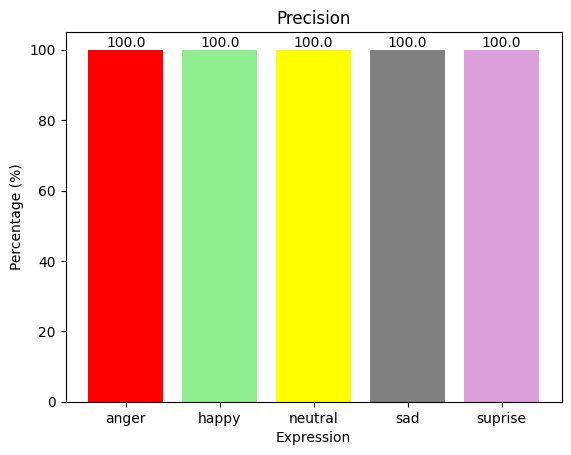

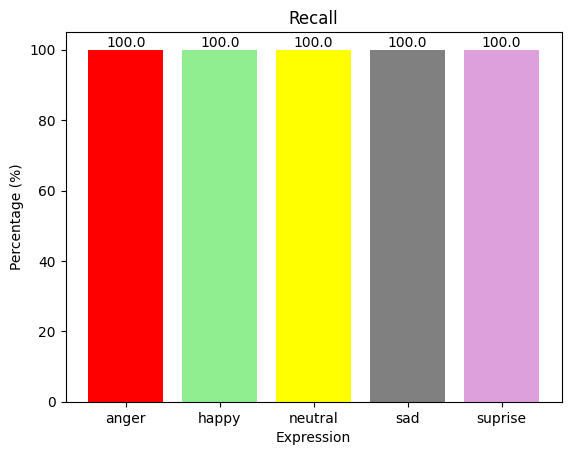

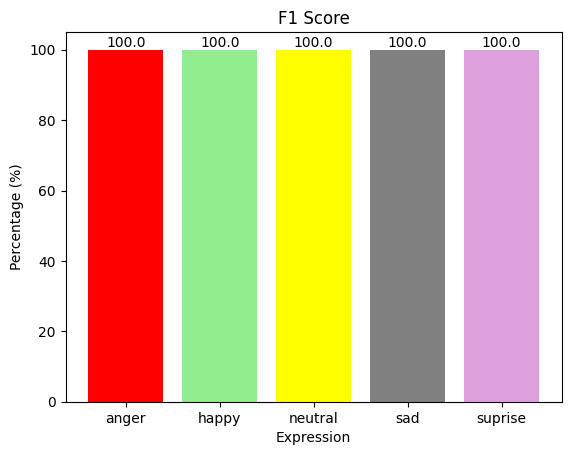

In [12]:
show_plot("Precision",rp.precision)
show_plot("Recall",rp.recall)
show_plot("F1 Score", rp['f1-score'])

In [14]:
confusion_matrix = confusion_matrix(y_test, prediction)

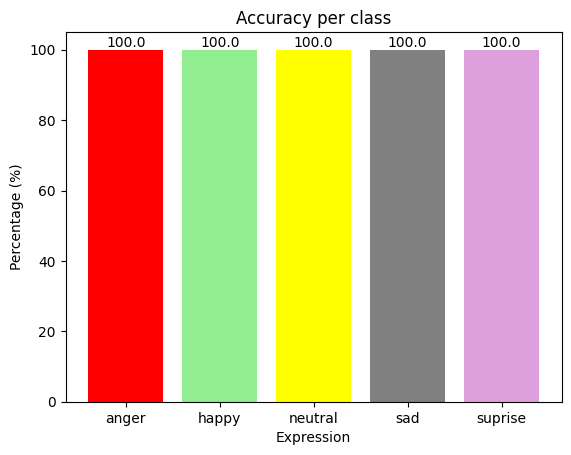

In [15]:
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
acc_per_class = confusion_matrix.diagonal()
apc = pd.DataFrame(index=['anger', 'happy', 'neutral', 'sad', 'suprise'],data=acc_per_class,columns=['Accuracy per class'])
apc = round(apc.iloc[0:]*100,2)
show_plot("Accuracy per class", apc['Accuracy per class'])

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, prediction)*100)

ValueError: Found input variables with inconsistent numbers of samples: [625, 1875]

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

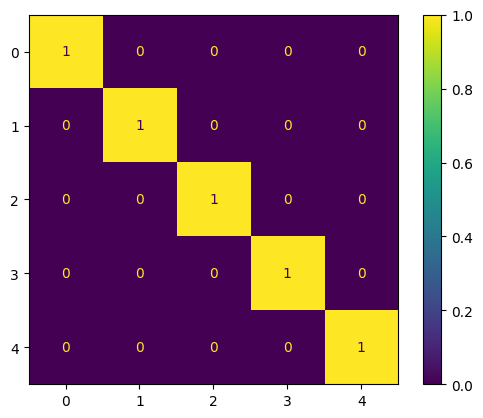

In [17]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, True])
cm_display.plot()
plt.show()